# outline
+ try antidifferentiation up to a known polynomial
+ track continuous deformation of the roots of derivatives

In [152]:
import numpy as np
import scipy.optimize as spopt
import sympy
from scipy.special import gamma
import polyrand
import importlib
import matplotlib.pyplot as plt
import utils
%matplotlib inline

In [181]:
importlib.reload(polyrand)
importlib.reload(utils)

<module 'utils' from '/Users/derekmiller/Desktop/D_stuff/polyrand/utils.py'>

Differentiate down to a degree 2 polynomial then antidifferentiate using the original coefficients.

In [265]:
def find_roots_x(d,stop_deg=2,basis='power'):
    """
    d is the degree of the original random polynomial
    stop_deg is stop after reaching a certain degree
    
    """

    coeffs = np.random.randn(d+1)
    coeffs[-1] = 1
    P = np.polynomial.polynomial.Polynomial(coeffs)
    if basis == 'chebyshev':
        P = P.convert(kind=np.polynomial.Chebyshev)
    
    constants = coeffs[:-stop_deg-1]
    constants = constants[::-1]
    for i in range(len(constants)):
        print(i,gamma(i+1))
        constants[i] *= gamma(i+1)/2**(i-1)
    dP = P.deriv(m=d-stop_deg)

    P_ = dP.integ(m=d-stop_deg,k=constants)
    #print(P.degree(),dP.degree(),P_.degree())
    # use scipy optimize to find exact zeros
    ext = []
    for r in P_.roots():
        if np.allclose(r.imag,0):
            sol = spopt.root(P,np.array([r.real]))
            ext.append(sol.x[0])
    #print("Roots found: ",ext)
    #print("Actual roots: ",P.roots())
    #print(P.coef)
    #print(P_.coef)

    utils.plot_poly_roots([P,P_],extras=ext)
    plt.figure(figsize=(16,4))
    plt.barh(np.arange(d+1),P.coef,alpha=.5)
    plt.barh(np.arange(d+1),P_.coef,alpha=.5)
    plt.show()
    


0 1.0
1 1.0
2 2.0


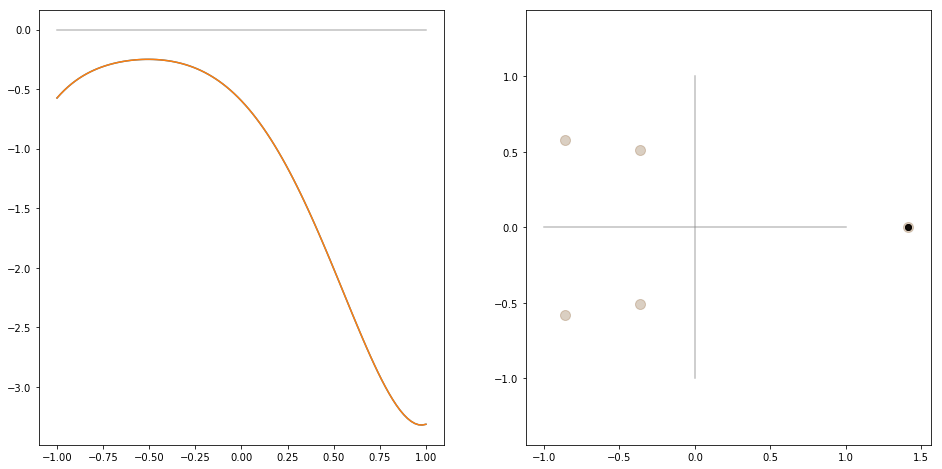

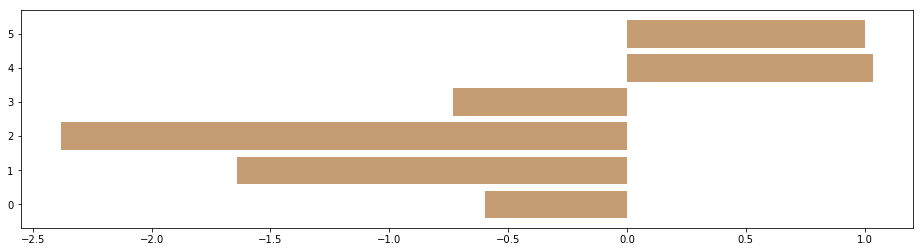

In [266]:
find_roots_x(5)

0 1.0
1 1.0
2 2.0
3 6.0
4 24.0


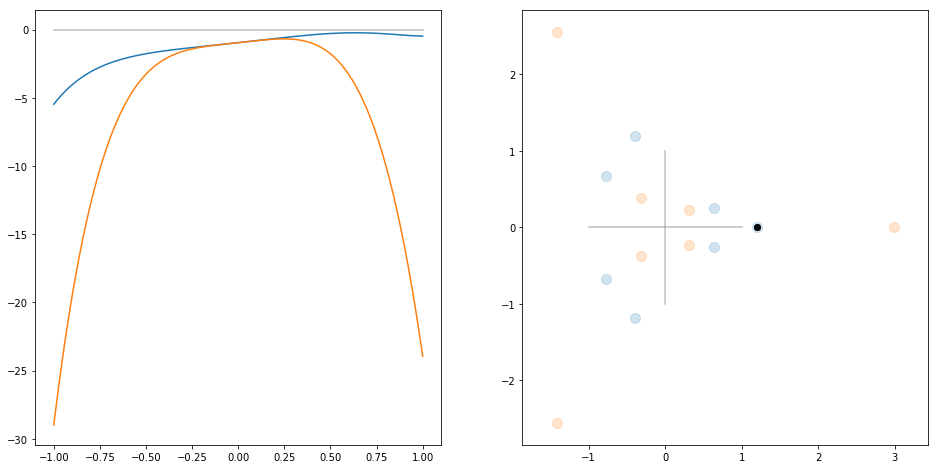

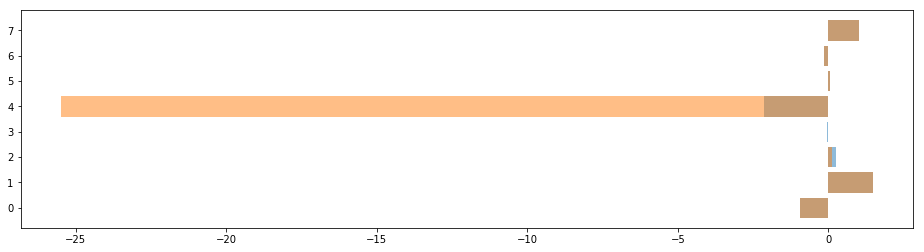

In [260]:
find_roots_x(7)

In [112]:
from sympy import mpmath

In [131]:
coeffs = np.random.randn(6)
coeffs [-1] = 1.
P = np.polynomial.polynomial.Polynomial(coeffs)
R = P.deriv(m=2).roots()
print(R)
print(P.deriv(m=2)((R[0])))

[-1.35587499 -0.2204492   0.4391331 ]
-9.32587340685e-15


In [132]:
mpmath.differint(P,R[0],n=2)

mpf('-1.2537350731978681e-14')